### This report analyzes cyber threat intelligence data collected over a period of time, focusing on the distribution and patterns of various threat types. It underscores the critical need for robust threat intelligence in protecting Small and Medium Enterprises (SMEs) and developing economies from a growing array of cyber threats.

# Week 3 

## Data Import 

In [2]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


In [3]:
# Import the data 
threat_data_raw = 'dataset29.txt'

# open the file 
with open(threat_data_raw, 'r') as file:
    file_content = file.read()

# Check the content structure by displating first 600 lines 
file_content[:600]

'{"classification.taxonomy": "intrusion-attempts", "classification.type": "brute-force", "event_description.text": "Address has been seen attempting to remotely login to a host using SSH password authentication. The source report lists hosts that are highly suspicious and are likely conducting malicious SSH password authentication attacks.", "feed.accuracy": 100.0, "feed.name": "HTTP", "feed.provider": "Dataplane", "feed.url": "https://dataplane.org/sshpwauth.txt", "protocol.application": "ssh", "source.abuse_contact": "abuse@digitalocean.com", "source.allocated": "2018-07-12T00:00:00+00:00", "'

In [4]:
import json
import pandas as pd

threat_data_raw = 'dataset29.txt'
line_number = 1  # Initialize a variable to keep track of the line number
threat_data = []

with open(threat_data_raw, 'r') as file:
    for line in file:
        try:
            threat_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error in line {line_number}: {e}")
        
        line_number += 1

# convert  to a DataFrame
threat_df = pd.DataFrame(threat_data)

# Display the first few rows of the DataFrame to verify the structure
threat_df

Error in line 60111: Expecting value: line 1 column 1 (char 0)
Error in line 165885: Expecting value: line 2 column 1 (char 1)
Error in line 231549: Expecting value: line 2 column 1 (char 1)
Error in line 280898: Expecting value: line 2 column 1 (char 1)
Error in line 283022: Expecting value: line 2 column 1 (char 1)
Error in line 289987: Expecting value: line 2 column 1 (char 1)


classification.taxonomy classification.type  \
0           intrusion-attempts         brute-force   
1           intrusion-attempts         brute-force   
2           intrusion-attempts         brute-force   
3           intrusion-attempts         brute-force   
4           intrusion-attempts         brute-force   
...                        ...                 ...   
289976          malicious-code           c2-server   
289977          malicious-code           c2-server   
289978          malicious-code           c2-server   
289979          malicious-code           c2-server   
289980          malicious-code           c2-server   

                                   event_description.text  feed.accuracy  \
0       Address has been seen attempting to remotely l...          100.0   
1       Address has been seen attempting to remotely l...          100.0   
2       Address has been seen attempting to remotely l...          100.0   
3       Address has been seen attempting to remotely l...          100.0   
4       Address has been seen attempting to remotely l...          100.0   
...                                                   ...            ...   
289976                                                NaN          100.0   
289977                                                NaN          100.0   
289978                                                NaN          100.0   
289979                                                NaN          100.0   
289980                                                NaN          100.0   

            feed.name feed.provider  \
0                HTTP     Dataplane   
1                HTTP     Dataplane   
2                HTTP     Dataplane   
3                HTTP     Dataplane   
4                HTTP     Dataplane   
...               ...           ...   
289976  Feodo Tracker      Abuse.ch   
289977  Feodo Tracker      Abuse.ch   
289978  Feodo Tracker      Abuse.ch   
289979  Feodo Tracker      Abuse.ch   
289980  Feodo Tracker      Abuse.ch   

                                                 feed.url  \
0                     https://dataplane.org/sshpwauth.txt   
1                     https://dataplane.org/sshpwauth.txt   
2                     https://dataplane.org/sshpwauth.txt   
3                     https://dataplane.org/sshpwauth.txt   
4                     https://dataplane.org/sshpwauth.txt   
...                                                   ...   
289976  https://feodotracker.abuse.ch/downloads/ipbloc...   
289977  https://feodotracker.abuse.ch/downloads/ipbloc...   
289978  https://feodotracker.abuse.ch/downloads/ipbloc...   
289979  https://feodotracker.abuse.ch/downloads/ipbloc...   
289980  https://feodotracker.abuse.ch/downloads/ipbloc...   

       protocol.application    source.abuse_contact  \
0                       ssh  abuse@digitalocean.com   
1                       ssh  abuse@digitalocean.com   
2                       ssh  abuse@digitalocean.com   
3                       ssh  abuse@digitalocean.com   
4                       ssh  abuse@digitalocean.com   
...                     ...                     ...   
289976                  NaN                     NaN   
289977                  NaN                     NaN   
289978                  NaN                     NaN   
289979                  NaN                     NaN   
289980                  NaN                     NaN   

                 source.allocated  ... extra.blocklist  source.fqdn  \
0       2018-07-12T00:00:00+00:00  ...             NaN          NaN   
1       2018-07-12T00:00:00+00:00  ...             NaN          NaN   
2       2020-01-17T00:00:00+00:00  ...             NaN          NaN   
3       2020-01-17T00:00:00+00:00  ...             NaN          NaN   
4       2020-01-17T00:00:00+00:00  ...             NaN          NaN   
...                           ...  ...             ...          ...   
289976  2009-07-21T00:00:00+00:00  ...             NaN          NaN   
289977  2013-0

## Data Preprocessing 

In [5]:
# Check for the missing values 
missing_values = threat_df.isnull().mean()

# Checking data types 
data_types = threat_df.dtypes

#Display missing values and data types 
missing_values, data_types

(classification.taxonomy    0.000000
 classification.type        0.000000
 event_description.text     0.072491
 feed.accuracy              0.000000
 feed.name                  0.000000
 feed.provider              0.000000
 feed.url                   0.000000
 protocol.application       0.066232
 source.abuse_contact       0.065253
 source.allocated           0.058176
 source.as_name             0.057883
 source.asn                 0.057824
 source.geolocation.cc      0.058283
 source.ip                  0.054193
 source.network             0.004114
 source.registry            0.058049
 time.observation           0.000000
 time.source                0.070691
 extra.blocklist            0.946065
 source.fqdn                0.987406
 source.port                0.986641
 source.url                 0.983454
 source.urlpath             0.988651
 status                     0.988254
 protocol.transport         0.994882
 extra.last_online          0.997990
 malware.name               0.997990
 

In [6]:
threat_df1=threat_df.copy()
# Converting 'time.observation' and 'time.source' to datetime objects
threat_df1['time.observation'] = pd.to_datetime(threat_df1['time.observation'])
threat_df1['time.source'] = pd.to_datetime(threat_df1['time.source'])
threat_df

classification.taxonomy classification.type  \
0           intrusion-attempts         brute-force   
1           intrusion-attempts         brute-force   
2           intrusion-attempts         brute-force   
3           intrusion-attempts         brute-force   
4           intrusion-attempts         brute-force   
...                        ...                 ...   
289976          malicious-code           c2-server   
289977          malicious-code           c2-server   
289978          malicious-code           c2-server   
289979          malicious-code           c2-server   
289980          malicious-code           c2-server   

                                   event_description.text  feed.accuracy  \
0       Address has been seen attempting to remotely l...          100.0   
1       Address has been seen attempting to remotely l...          100.0   
2       Address has been seen attempting to remotely l...          100.0   
3       Address has been seen attempting to remotely l...          100.0   
4       Address has been seen attempting to remotely l...          100.0   
...                                                   ...            ...   
289976                                                NaN          100.0   
289977                                                NaN          100.0   
289978                                                NaN          100.0   
289979                                                NaN          100.0   
289980                                                NaN          100.0   

            feed.name feed.provider  \
0                HTTP     Dataplane   
1                HTTP     Dataplane   
2                HTTP     Dataplane   
3                HTTP     Dataplane   
4                HTTP     Dataplane   
...               ...           ...   
289976  Feodo Tracker      Abuse.ch   
289977  Feodo Tracker      Abuse.ch   
289978  Feodo Tracker      Abuse.ch   
289979  Feodo Tracker      Abuse.ch   
289980  Feodo Tracker      Abuse.ch   

                                                 feed.url  \
0                     https://dataplane.org/sshpwauth.txt   
1                     https://dataplane.org/sshpwauth.txt   
2                     https://dataplane.org/sshpwauth.txt   
3                     https://dataplane.org/sshpwauth.txt   
4                     https://dataplane.org/sshpwauth.txt   
...                                                   ...   
289976  https://feodotracker.abuse.ch/downloads/ipbloc...   
289977  https://feodotracker.abuse.ch/downloads/ipbloc...   
289978  https://feodotracker.abuse.ch/downloads/ipbloc...   
289979  https://feodotracker.abuse.ch/downloads/ipbloc...   
289980  https://feodotracker.abuse.ch/downloads/ipbloc...   

       protocol.application    source.abuse_contact  \
0                       ssh  abuse@digitalocean.com   
1                       ssh  abuse@digitalocean.com   
2                       ssh  abuse@digitalocean.com   
3                       ssh  abuse@digitalocean.com   
4                       ssh  abuse@digitalocean.com   
...                     ...                     ...   
289976                  NaN                     NaN   
289977                  NaN                     NaN   
289978                  NaN                     NaN   
289979                  NaN                     NaN   
289980                  NaN                     NaN   

                 source.allocated  ... extra.blocklist  source.fqdn  \
0       2018-07-12T00:00:00+00:00  ...             NaN          NaN   
1       2018-07-12T00:00:00+00:00  ...             NaN          NaN   
2       2020-01-17T00:00:00+00:00  ...             NaN          NaN   
3       2020-01-17T00:00:00+00:00  ...             NaN          NaN   
4       2020-01-17T00:00:00+00:00  ...             NaN          NaN   
...                           ...  ...             ...          ...   
289976  2009-07-21T00:00:00+00:00  ...             NaN          NaN   
289977  2013-0

In [7]:
# Extract hour of day and day of week from the time.observation
threat_df1['hour_of_day'] = threat_df1['time.observation'].dt.hour
threat_df1['day_of_week'] =threat_df1['time.observation'].dt.dayofweek
threat_df1

classification.taxonomy classification.type  \
0           intrusion-attempts         brute-force   
1           intrusion-attempts         brute-force   
2           intrusion-attempts         brute-force   
3           intrusion-attempts         brute-force   
4           intrusion-attempts         brute-force   
...                        ...                 ...   
289976          malicious-code           c2-server   
289977          malicious-code           c2-server   
289978          malicious-code           c2-server   
289979          malicious-code           c2-server   
289980          malicious-code           c2-server   

                                   event_description.text  feed.accuracy  \
0       Address has been seen attempting to remotely l...          100.0   
1       Address has been seen attempting to remotely l...          100.0   
2       Address has been seen attempting to remotely l...          100.0   
3       Address has been seen attempting to remotely l...          100.0   
4       Address has been seen attempting to remotely l...          100.0   
...                                                   ...            ...   
289976                                                NaN          100.0   
289977                                                NaN          100.0   
289978                                                NaN          100.0   
289979                                                NaN          100.0   
289980                                                NaN          100.0   

            feed.name feed.provider  \
0                HTTP     Dataplane   
1                HTTP     Dataplane   
2                HTTP     Dataplane   
3                HTTP     Dataplane   
4                HTTP     Dataplane   
...               ...           ...   
289976  Feodo Tracker      Abuse.ch   
289977  Feodo Tracker      Abuse.ch   
289978  Feodo Tracker      Abuse.ch   
289979  Feodo Tracker      Abuse.ch   
289980  Feodo Tracker      Abuse.ch   

                                                 feed.url  \
0                     https://dataplane.org/sshpwauth.txt   
1                     https://dataplane.org/sshpwauth.txt   
2                     https://dataplane.org/sshpwauth.txt   
3                     https://dataplane.org/sshpwauth.txt   
4                     https://dataplane.org/sshpwauth.txt   
...                                                   ...   
289976  https://feodotracker.abuse.ch/downloads/ipbloc...   
289977  https://feodotracker.abuse.ch/downloads/ipbloc...   
289978  https://feodotracker.abuse.ch/downloads/ipbloc...   
289979  https://feodotracker.abuse.ch/downloads/ipbloc...   
289980  https://feodotracker.abuse.ch/downloads/ipbloc...   

       protocol.application    source.abuse_contact  \
0                       ssh  abuse@digitalocean.com   
1                       ssh  abuse@digitalocean.com   
2                       ssh  abuse@digitalocean.com   
3                       ssh  abuse@digitalocean.com   
4                       ssh  abuse@digitalocean.com   
...                     ...                     ...   
289976                  NaN                     NaN   
289977                  NaN                     NaN   
289978                  NaN                     NaN   
289979                  NaN                     NaN   
289980                  NaN                     NaN   

                 source.allocated  ... source.port  source.url source.urlpath  \
0       2018-07-12T00:00:00+00:00  ...         NaN         NaN            NaN   
1       2018-07-12T00:00:00+00:00  ...         NaN         NaN            NaN   
2       2020-01-17T00:00:00+00:00  ...         NaN         NaN            NaN   
3       2020-01-17T00:00:00+00:00  ...         NaN         NaN            NaN   
4       2020-01-17T00:00:00+00:00  ...         NaN         NaN            NaN   
...                           ...  ...         ...         ...            ...   
289976  2009-07

## Visualisation

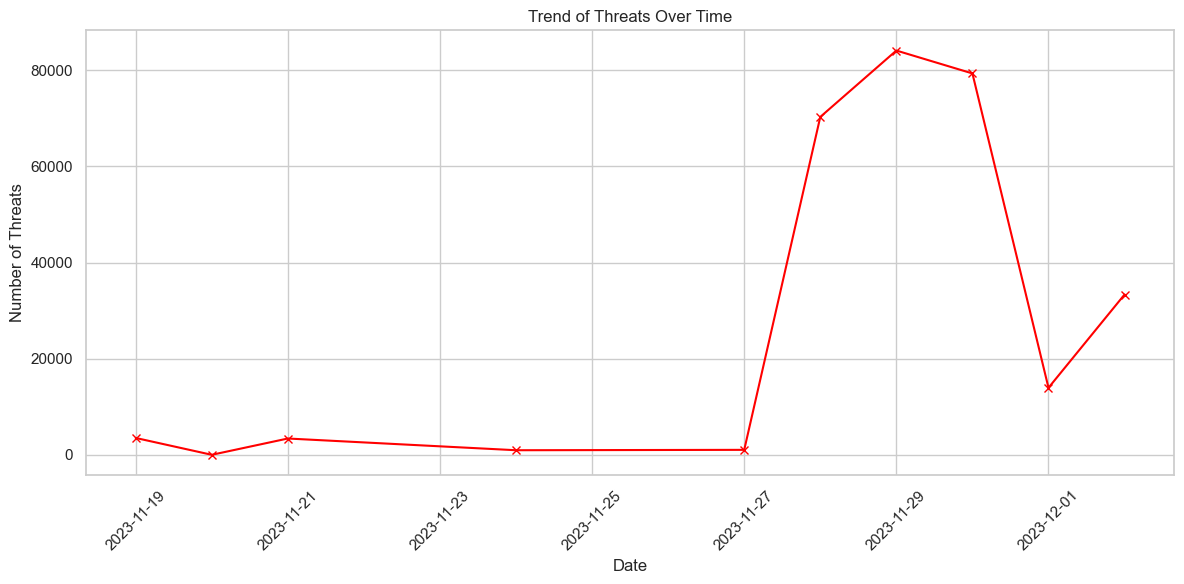

In [8]:
# Set visualisation style
sns.set(style="whitegrid")

# Trend Analysis over time : Number of threats over time
plt.figure(figsize=(12, 6))
threat_df1['time.observation'].dt.date.value_counts().sort_index().plot(kind='line', color='red', marker='x')
plt.title('Trend of Threats Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Threats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

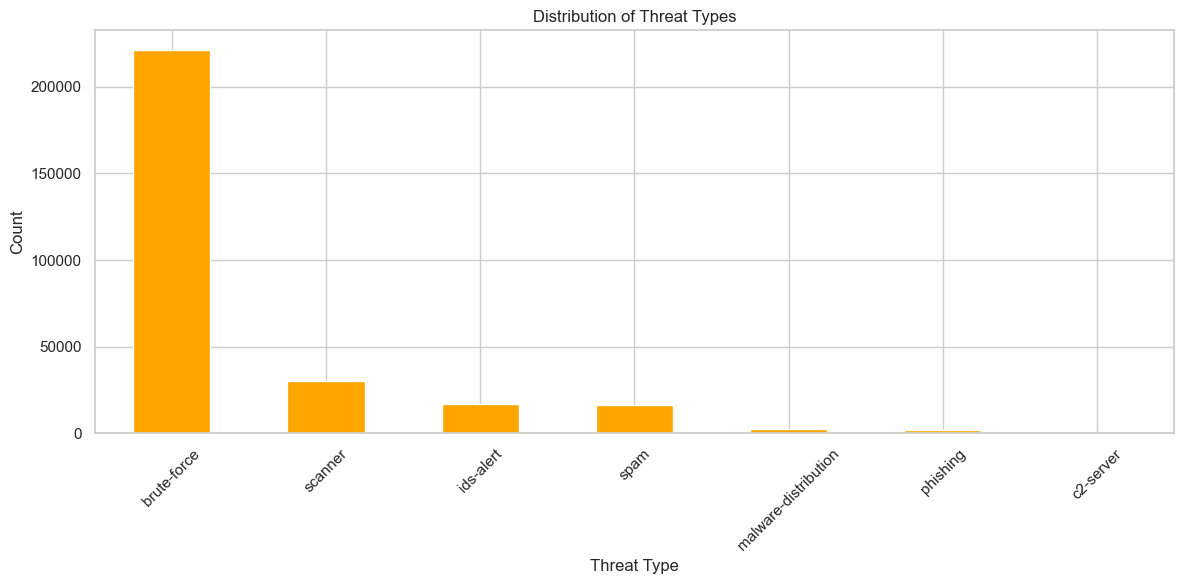

In [9]:
# Threat Type Distribution
plt.figure(figsize=(12, 6))
threat_df1['classification.type'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Threat Types')
plt.xlabel('Threat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The "Distribution of Threat Types" chart indicates a predominant prevalence of 'brute-force' attacks, followed by other threat types like 'spam', 'scanner', and 'malware-distribution'. This pattern suggests that attackers commonly exploit weak authentication mechanisms, which can often be a low-hanging fruit in less secured networks typical of SMEs and developing economies.

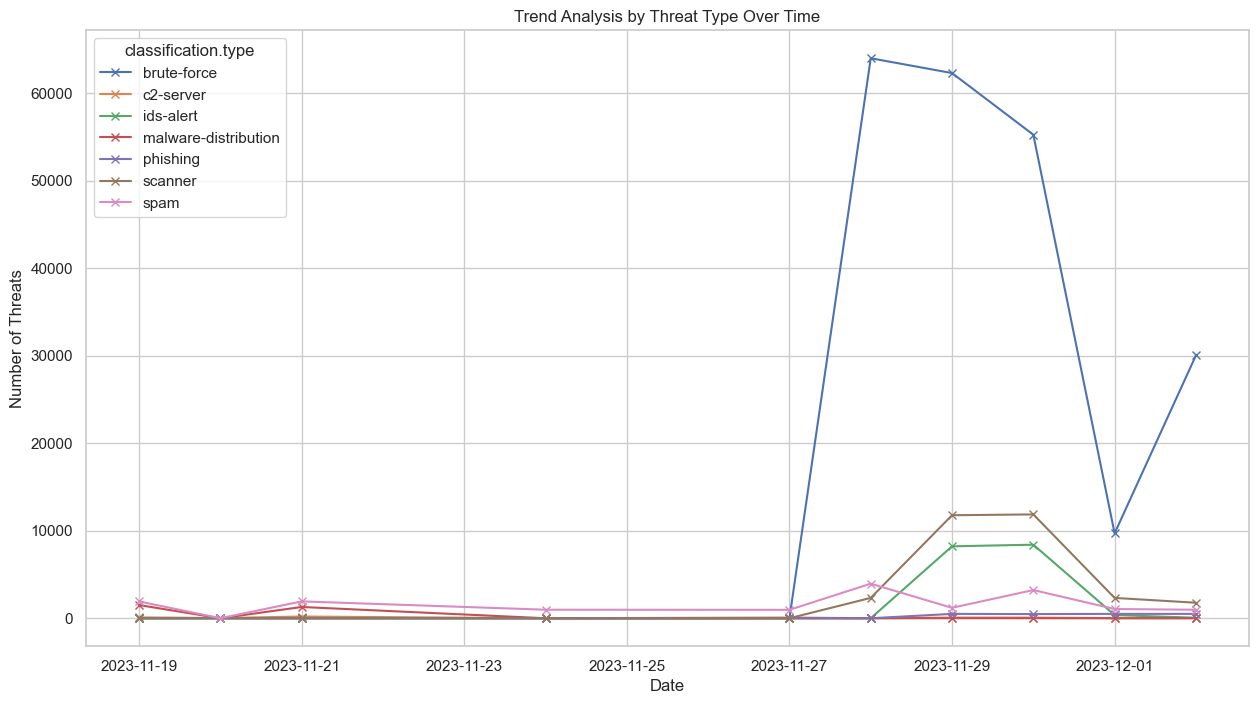

In [10]:
#Trends by threat types over time 
threat_df1['date'] = threat_df1['time.observation'].dt.date
grouped = threat_df1.groupby(['date', 'classification.type']).size().unstack(fill_value=0)
grouped.plot(kind='line',marker='x', figsize=(15, 8))
plt.title('Trend Analysis by Threat Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Threats')
plt.show()


#### The graph above illustrates the dynamics of various threat types. It is evident that certain threats peak at different times, necessitating continuous monitoring and adaptive defense strategies.

# Week 4

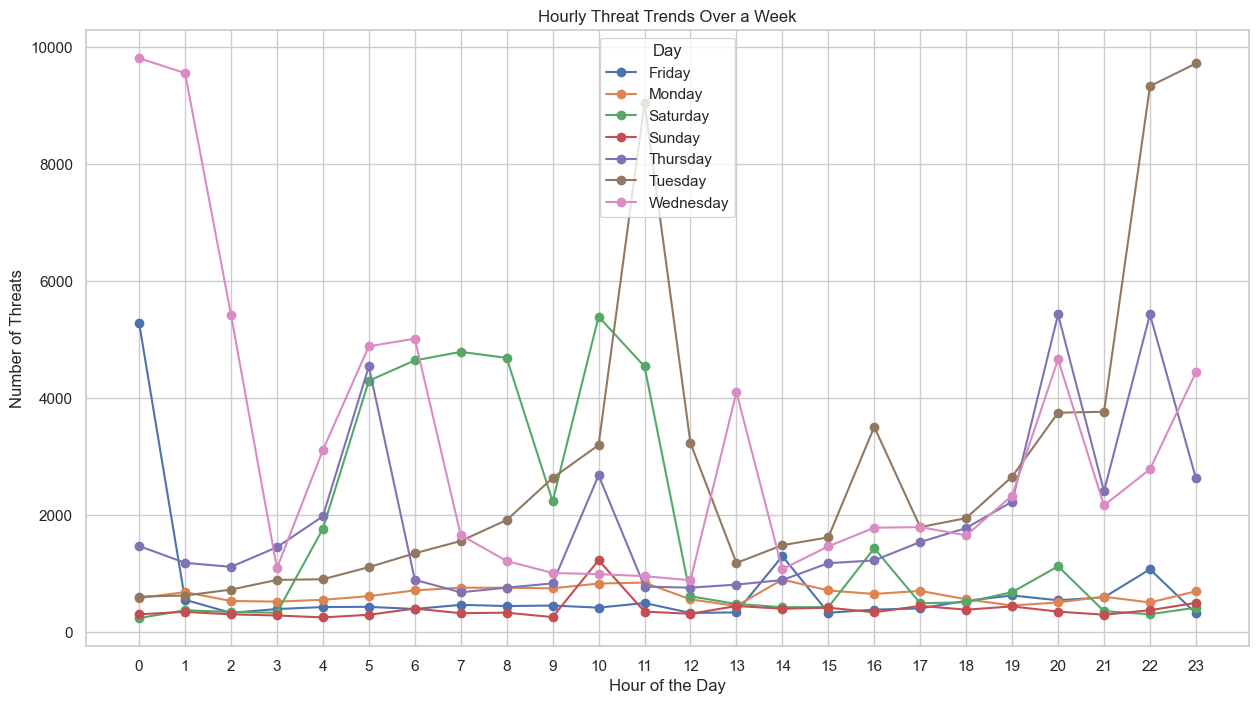

In [11]:
# Create a new column 'day' based on the 'time.source' column with the day of the week.
threat_df1['day'] = threat_df1['time.source'].dt.strftime('%A')

# Group the data by 'day' and 'time.source' to calculate the number of threats per hour for each day.
hourly_trends = threat_df1.groupby(['day', threat_df1['time.source'].dt.hour]).size().unstack()

# Plot each day's hourly trend as a separate line.
hourly_trends.T.plot(kind='line', figsize=(15, 8), marker='o')

plt.title('Hourly Threat Trends Over a Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Threats')
plt.legend(title='Day')
plt.xticks(range(24))  # Display all 24 hours on the x-axis

plt.show()

#### Variations in threat activity across different days and hours, as shown in the "Hourly Threat Trends Over a Week" chart, highlight the need for time-based security measures and the potential benefit of threat forecasting.This would also enable anamoly detection with a sudden spike which could indicate active targeted attack for instance

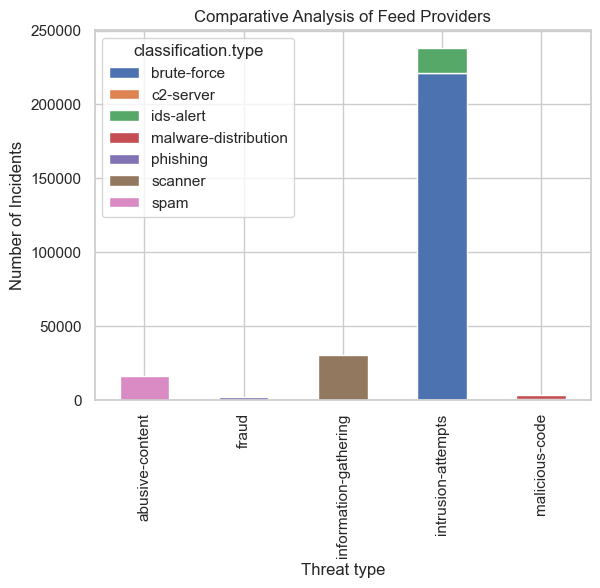

In [12]:
# Group by provider and type of spam
df_provider = threat_df1.groupby(['classification.taxonomy', 'classification.type']).size().unstack()

# Plotting
df_provider.plot(kind='bar', stacked=True)
plt.title('Comparative Analysis of Feed Providers')
plt.xlabel('Threat type')
plt.ylabel('Number of Incidents')
plt.show()

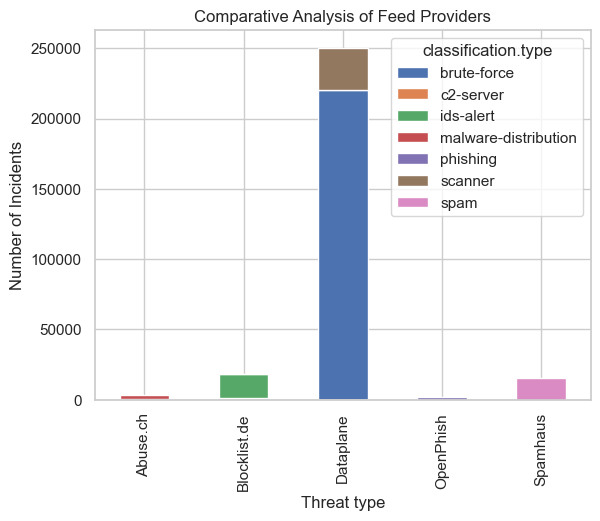

In [13]:
# Group by provider and type of spam
df_provider = threat_df1.groupby(['feed.provider', 'classification.type']).size().unstack()

# Plotting
df_provider.plot(kind='bar', stacked=True)
plt.title('Comparative Analysis of Feed Providers')
plt.xlabel('Threat type')
plt.ylabel('Number of Incidents')
plt.show()

#### A comparison of threat data by type from various feed providers demonstrates the diversity in threat detection capabilities. SMEs and developing economies can benefit from a multi-sourced approach to threat intelligence for a more comprehensive defense posture.

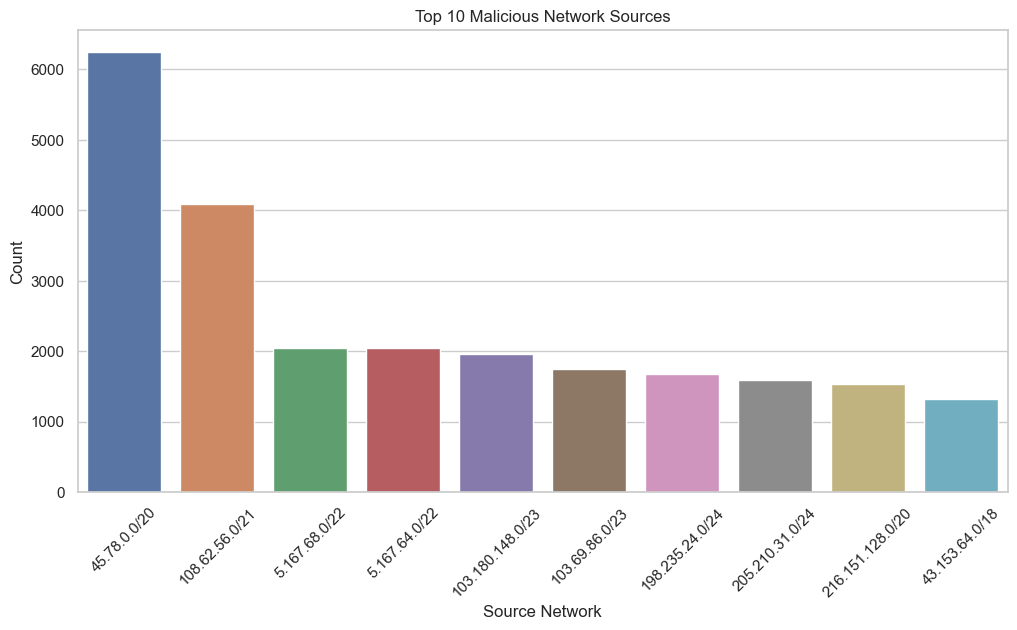

In [14]:

# Group by source network and count incidents
plt.figure(figsize=(12, 6))
source_network_counts = threat_df1['source.network'].value_counts()
sns.barplot(x=source_network_counts.head(10).index, y=source_network_counts.head(10).values)
plt.title('Top 10 Malicious Network Sources')
plt.xlabel('Source Network')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Identifying the most frequent sources of threats can help in proactively blocking or monitoring traffic from these networks, an approach particularly useful for resource-constrained environments.

In [ ]:
import plotly.express as px

# Group by classification type and country code, and count occurrences
df_grouped = threat_df1.groupby(['classification.type', 'source.geolocation.cc']).size().reset_index(name='count')

# Creating a treemap
fig = px.treemap(df_grouped, 
                 path=['classification.type', 'source.geolocation.cc'], 
                 values='count', 
                 title='Threat Classification Types by Source Country')

# Displaying the figure
fig.show()

#### The geographical distribution of threat origins, as shown in the "Threat Classification Types by Source Country" chart, can help in understanding regional threat landscapes and may inform geopolitical risk assessments.

In [16]:
import plotly.express as px

# Group by classification type and country code, and count occurrences
df_grouped = threat_df1.groupby(['classification.type','source.as_name']).size().reset_index(name='count')

# Creating a treemap
fig = px.treemap(df_grouped, 
                 path=['classification.type','source.as_name'], 
                 values='count', 
                 title='Threat Classification Types by AS_Name')

# Displaying the figure
fig.show()

#### Analysis by Autonomous System (AS) offers insights into which networks are most compromised or malicious. This knowledge can support network-level security measures, critical for SMEs and economies where infrastructure may be shared.

## Identify IP address involved in more than one malacious activity

In [17]:
# Group by IP address and aggregate classification types
grouped = threat_df1.groupby('source.ip')['classification.type'].agg(set).reset_index()

# Filter for IP addresses with multiple classification types
multiple_classifications = grouped[grouped['classification.type'].apply(lambda x: len(x) > 1)]

# Display the result
print(multiple_classifications)

             source.ip       classification.type
136         1.14.92.22  {brute-force, ids-alert}
849    102.134.165.190  {brute-force, ids-alert}
957     103.106.116.37  {brute-force, ids-alert}
993     103.110.86.217  {brute-force, ids-alert}
1022     103.117.56.98  {brute-force, ids-alert}
...                ...                       ...
47660      93.89.73.11  {brute-force, ids-alert}
48149    95.142.121.41  {brute-force, ids-alert}
48204     95.186.62.94  {brute-force, ids-alert}
48213    95.214.26.220  {brute-force, ids-alert}
48284    95.71.231.211  {brute-force, ids-alert}

[699 rows x 2 columns]


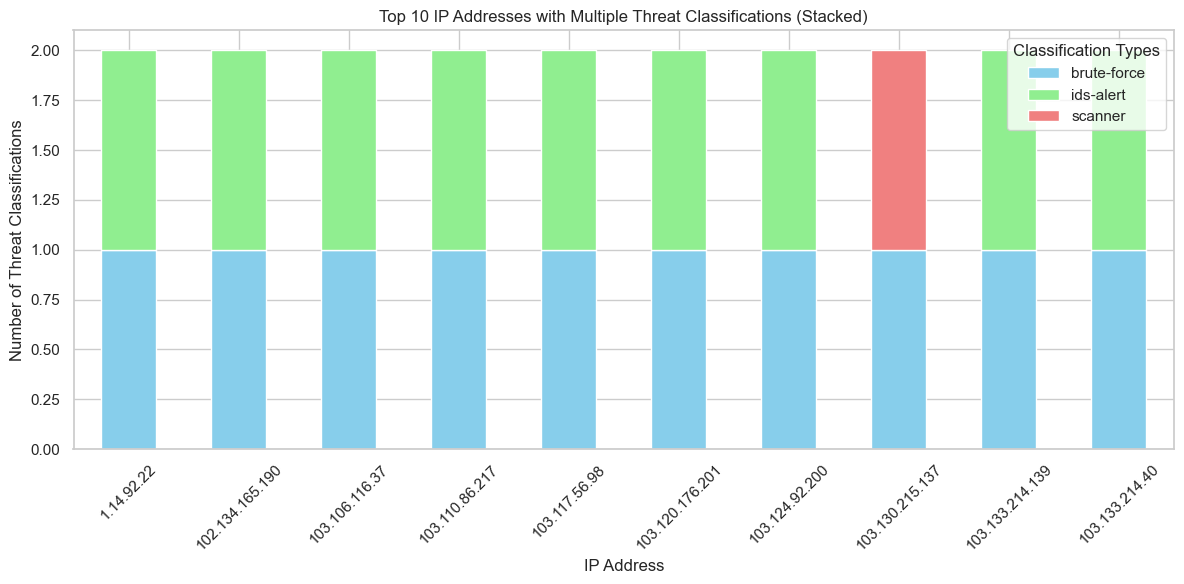

In [18]:
# Create a copy of the slice to avoid SettingWithCopyWarning
top_multiple_classifications = multiple_classifications.head(10).copy()
top_multiple_classifications['classification_count'] = top_multiple_classifications['classification.type'].apply(len)

# Exploding the classification types into separate rows
exploded_data = top_multiple_classifications.explode('classification.type')

# Counting occurrences
count_data = exploded_data.groupby(['source.ip', 'classification.type']).size().reset_index(name='counts')

# Pivoting data for stacking
pivot_data = count_data.pivot(index='source.ip', columns='classification.type', values='counts').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))

# Creating a stacked bar chart
pivot_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral', 'khaki', 'mediumpurple'], figsize=(12, 6), ax=plt.gca())

plt.title('Top 10 IP Addresses with Multiple Threat Classifications (Stacked)')
plt.xlabel('IP Address')
plt.ylabel('Number of Threat Classifications')
plt.xticks(rotation=45)
plt.legend(title="Classification Types")
plt.tight_layout()

# Display the plot
plt.show()



#### This graph aids threat analysts in identifying high-risk IP addresses associated with multiple cyber threats, enabling prioritization of investigation and response. It visually represents the diversity and frequency of threats per IP, assisting in pattern recognition, trend analysis, and effective communication of the threat landscape to stakeholders.

### Identifying common keywords in malicious urls

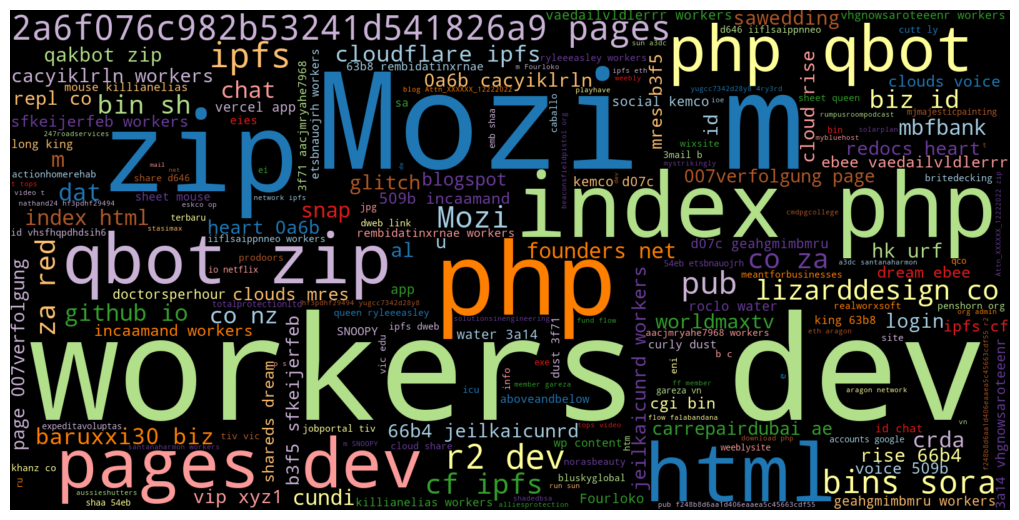

In [19]:

urls_series = threat_df1['source.url']

urls_string = ' '.join(urls_series.dropna().astype(str))

stopwords = set(WordCloud().stopwords)
stopwords.update(['au','https'])  
wordcloud = WordCloud(width=1600, height=800, background_color='black', colormap='Paired', stopwords=stopwords).generate(urls_string)
# Plot
plt.figure(figsize=(10, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### A word cloud like this in threat intelligence can highlight common terms in security breaches, helping prioritize keywords for monitoring and alerting systems.